In [2]:
import numpy as np

In [10]:
class Perceptron:
  def __init__(self,N,alpha=0.1):
    self.W=np.random.randn(N+1)/np.sqrt(N)
    self.alpha=alpha

  def step(self,x):
    return 1 if x>0 else 0

  def fit(self,X,y,epochs=10):
    X=np.c_[np.ones((X.shape[0])),X]

    for epoch in np.arange(0,epochs):
      for (x,target) in zip(X,y):
        p=self.step(np.dot(x,self.W))
        if p != target:
          error=p-target
          self.W+=-self.alpha*error*x
  def predict(self,X,add_bias=True):
    X=np.atleast_2d(X)
    if add_bias:
      X=np.c_[np.ones((X.shape[0])),X]

    return self.step(np.dot(X,self.W))


In [ ]:
# fit -> whole data
# predict -> for each data

In [11]:
# OR

X= np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[1]])


In [12]:
X.shape[0]

4

In [14]:
X.shape[1]


2

In [15]:
model=Perceptron(X.shape[1],alpha=0.1)
model

In [16]:
model.fit(X,y,epochs=20)

In [18]:
for (x,target) in zip(X,y):
  predict=model.predict(x)
  print(f'X={x} , label={target[0]}, prediction={predict}')

X=[0 0] , label=0, prediction=0
X=[0 1] , label=1, prediction=1
X=[1 0] , label=1, prediction=1
X=[1 1] , label=1, prediction=1


In [19]:
# OR را یاد گرفته است.


In [20]:
model.W

array([-0.16884097,  0.55647838,  0.32134473])

In [21]:
w0,w1,w2=model.W

In [22]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [23]:
X[:,0]

array([0, 0, 1, 1])

In [24]:
x2_hat=-1*(X[:,0]*w1+w0)/w2

In [25]:
y

array([[0],
       [1],
       [1],
       [1]])

In [26]:
y.flatten()

array([0, 1, 1, 1])

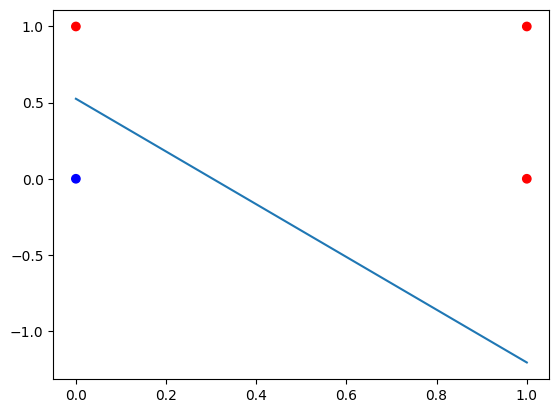

In [28]:
import matplotlib.pyplot as plt
colors=['blue','red']
y_colors=[colors[i] for i in y.flatten()]
plt.scatter(X[:,0],X[:,1],color=y_colors)
plt.plot(X[:,0],x2_hat)

# Linear Separable

In [29]:
# AND *

In [30]:
# XOR

X= np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])


In [31]:
model=Perceptron(X.shape[1],alpha=0.1)
model.fit(X,y,epochs=20)
for (x,target) in zip(X,y):
  predict=model.predict(x)
  print(f'X={x} , label={target[0]}, prediction={predict}')

w0,w1,w2=model.W

X=[0 0] , label=0, prediction=1
X=[0 1] , label=1, prediction=1
X=[1 0] , label=1, prediction=0
X=[1 1] , label=0, prediction=0


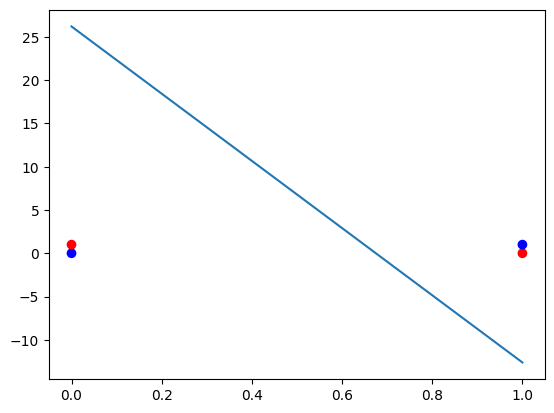

In [32]:
x2_hat=-1*(X[:,0]*w1+w0)/w2
import matplotlib.pyplot as plt
colors=['blue','red']
y_colors=[colors[i] for i in y.flatten()]
plt.scatter(X[:,0],X[:,1],color=y_colors)
plt.plot(X[:,0],x2_hat)

# Linear Separable

In [33]:
! pip install scikit-learn

In [34]:
from sklearn.neural_network import MLPClassifier



In [35]:
import pandas as pd
import numpy as np

prefix_url='https://graphemy.ir/datasets'
def get_file(name):
  file_name=name if '.csv' in name else f'{name}.csv'
  return f'{prefix_url}/{file_name}'

In [37]:
df=pd.read_csv(get_file("heart_failure_clinical_records_dataset"))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
df['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [39]:
X=df.drop('DEATH_EVENT',axis=1).to_numpy()
y=df['DEATH_EVENT'].to_numpy()

X.shape,y.shape

((299, 12), (299,))

In [ ]:
# train over mlp

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
model=MLPClassifier(hidden_layer_sizes=100,max_iter=300)

In [46]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=300)

In [43]:
prediction=model.predict(X_test)


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        36
           1       0.40      0.96      0.56        24

    accuracy                           0.40        60
   macro avg       0.45      0.49      0.31        60
weighted avg       0.46      0.40      0.26        60



In [47]:
model.fit(X_train_scaled,y_train)
prediction=model.predict(X_test_scaled)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.75      0.75      0.75        24

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Grid Search -> Best MLP *

# Grid Search -> Best LR, DT *

# Occam Razor *

In [ ]:
# تا امشب لطفا اکانت گیت هاب بسازید و آدرس را برای من ارسال کنید.
# دستورالعمل ارسال تمرین‌های هفتگی در گیت هاب رو بعد از ساختن اکانت همه، در کانال قرار میدهم
# گروه تلگرامی دوره امروز ساخته می شود
# مهلت ارسال تمرین ها: تا چهارشنبه هفته بعد (ساعت 14)
